In [38]:
from datasets import load_dataset
import librosa
import pandas as pd

ds = load_dataset("papasega/Avalinguo-Audio-Dataset-splitted")

In [9]:
import numpy as np

In [10]:
df_train = ds['train'].to_pandas()
df_test = ds['test'].to_pandas()

In [109]:
df_train

,filename,label,finalText,num_words,segment_duration,words_per_sec,user,duration,speech_rate,speech_rate_segment,lexical_density,1gram_repeat,2gram_repeat,3gram_repeat,4gram_repeat,5gram_repeat,audio,audio_signal,sampling_rate
0,Intermediate_Avalinguo_Conversation_6_segment_9,Intermediate,hello a bron a carton college is sp,8,3.30,2.424242,Avalinguo_Conversation_6,5.0,96.0,145.454548,50.000000,2,0,0,0,0,"{'array': [0.01898193359375, 0.035125732421875...","[0.01898193359375, 0.035125732421875, 0.043731...",16000
1,Intermediate_Avalinguo_Conversation_2_segment_4,Intermediate,and you recently joined the representative tex...,14,4.70,2.978723,Avalinguo_Conversation_2,5.0,168.0,178.723393,42.857143,0,0,0,0,0,"{'array': [-0.040283203125, -0.001678466796875...","[-0.040283203125, -0.001678466796875, 0.183502...",16000
2,Intermediate_Avalinguo_Itzel_and_Friend_segmen...,Intermediate,offer the value we looked they were,7,4.42,1.583710,Avalinguo_Itzel_and_Friend,5.0,84.0,95.022623,28.571429,0,0,0,0,0,"{'array': [0.041534423828125, 0.04244995117187...","[0.041534423828125, 0.042449951171875, 0.03106...",16000
3,High_Wonderful_Abstract_Notions_segment_196,High,for dimensions it is basically taken something...,12,3.78,3.174603,Wonderful_Abstract_Notions,5.0,144.0,190.476204,33.333333,2,0,0,0,0,"{'array': [-0.023223876953125, -0.011779785156...","[-0.023223876953125, -0.01177978515625, 0.0040...",16000
4,Intermediate_Avalinguo_Conversation_1_segment_19,Intermediate,and we shall do a campaign and anything,8,2.88,2.777778,Avalinguo_Conversation_1,5.0,96.0,166.666677,12.500000,2,0,0,0,0,"{'array': [0.001861572265625, 0.00082397460937...","[0.001861572265625, 0.000823974609375, -0.0011...",16000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,High_Avalinguo_Manuel_and_Dayana_segment_114,High,and some mole on top and i,7,4.70,1.489362,Avalinguo_Manuel_and_Dayana,5.0,84.0,89.361697,14.285714,2,0,0,0,0,"{'array': [-0.023284912109375, -0.021606445312...","[-0.023284912109375, -0.0216064453125, -0.0209...",16000
1037,Intermediate_Avalinguo_Xoca_and_Josué_segment_...,Intermediate,so when it come,4,2.08,1.923077,Avalinguo_Xoca_and_Josué,5.0,48.0,115.384606,0.000000,0,0,0,0,0,"{'array': [0.002655029296875, 0.00088500976562...","[0.002655029296875, 0.000885009765625, -0.0018...",16000
1038,Low_Avalinguo_Victor_and_Abraham_segment_119,Low,i i do not know i never do that before but i t...,15,3.76,3.989362,Avalinguo_Victor_and_Abraham,5.0,180.0,239.361703,0.000000,9,2,0,0,0,"{'array': [-0.0001220703125, -9.1552734375e-05...","[-0.0001220703125, -9.1552734375e-05, -0.00012...",16000
1039,High_Avalinguo_Manuel_and_Dayana_segment_91,High,reference i asked at the man like you have any...,13,4.30,3.023256,Avalinguo_Manuel_and_Dayana,5.0,156.0,181.395341,15.384615,0,0,0,0,0,"{'array': [0.0013427734375, 0.001922607421875,...","[0.0013427734375, 0.001922607421875, 0.0023193...",16000


In [11]:
# Extract audio signal and sampling rate into separate columns
df_train['audio_signal'] = df_train['audio'].apply(lambda x: x['array'])
df_train['sampling_rate'] = df_train['audio'].apply(lambda x: x['sampling_rate'])
# Extract audio signal and sampling rate into separate columns
df_test['audio_signal'] = df_test['audio'].apply(lambda x: x['array'])
df_test['sampling_rate'] = df_test['audio'].apply(lambda x: x['sampling_rate'])

In [12]:
df_train['audio_signal'] = df_train['audio_signal'].to_numpy()
df_test['audio_signal'] = df_test['audio_signal'].to_numpy()

In [13]:
df_train_dropped = df_train.drop(columns=['2gram_repeat', 
                       '3gram_repeat',
                       '4gram_repeat', 
                       '5gram_repeat', 
                       'audio', 
                       'duration', 
                       'filename', 
                       'num_words', 
                       'segment_duration',
                       'speech_rate_segment',
                       'words_per_sec',
                       'user',
                       'finalText', 
                       'sampling_rate', 
                        'audio'
                                         ])
df_test_dropped = df_test.drop(columns=['2gram_repeat', 
                       '3gram_repeat',
                       '4gram_repeat', 
                       '5gram_repeat', 
                       'audio', 
                       'duration', 
                       'filename', 
                       'num_words', 
                       'segment_duration',
                       'speech_rate_segment',
                       'words_per_sec',
                       'user',
                       'finalText', 
                       'sampling_rate',
                        'audio'
                                         ])
df_train_dropped

,label,speech_rate,lexical_density,1gram_repeat,audio_signal
0,Intermediate,96.0,50.000000,2,"[0.01898193359375, 0.035125732421875, 0.043731..."
1,Intermediate,168.0,42.857143,0,"[-0.040283203125, -0.001678466796875, 0.183502..."
2,Intermediate,84.0,28.571429,0,"[0.041534423828125, 0.042449951171875, 0.03106..."
3,High,144.0,33.333333,2,"[-0.023223876953125, -0.01177978515625, 0.0040..."
4,Intermediate,96.0,12.500000,2,"[0.001861572265625, 0.000823974609375, -0.0011..."
...,...,...,...,...,...
1036,High,84.0,14.285714,2,"[-0.023284912109375, -0.0216064453125, -0.0209..."
1037,Intermediate,48.0,0.000000,0,"[0.002655029296875, 0.000885009765625, -0.0018..."
1038,Low,180.0,0.000000,9,"[-0.0001220703125, -9.1552734375e-05, -0.00012..."
1039,High,156.0,15.384615,0,"[0.0013427734375, 0.001922607421875, 0.0023193..."


### Sampling rate: 160000
How To get:
1. lexical_density: get text using whisper and use the function on the text
2. speech_rate: record yourself talking for a few minutes and then add up the number of words in your speech. Divide the total number of words by the number of minutes your speech took
3. 1gram_repeat: get a repeating token
**first get the cleaned text first (lowercase, no number, no symbol, stemmed)**

In [14]:
hop_length = 512

# time domain features 
def zeroCrossingRate(df):
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y = df['audio_signal'], hop_length = hop_length)[0]
    df['ZCR(mean)'] = zero_crossing_rate.mean()
    df['ZCR(std)'] = zero_crossing_rate.std()
    return df
df_train_dropped = df_train_dropped.apply(zeroCrossingRate, axis = 1)
df_test_dropped = df_test_dropped.apply(zeroCrossingRate, axis = 1)

In [15]:
sr = 16000
n_mfcc = 25
def mfcc(df):
    mfcc = librosa.feature.mfcc(y = df['audio_signal'], sr = sr , n_mfcc = n_mfcc)
    for i in range(0, n_mfcc):
        df[f'mfcc_{i+1}(mean)'] = mfcc[i].mean()
        df[f'mfcc_{i+1}(std)'] = mfcc[i].std()
    return df
df_train_dropped = df_train_dropped.apply(mfcc, axis = 1)
df_test_dropped = df_test_dropped.apply(mfcc, axis = 1)

In [16]:
df_train_dropped

,label,speech_rate,lexical_density,1gram_repeat,audio_signal,ZCR(mean),ZCR(std),mfcc_1(mean),mfcc_1(std),mfcc_2(mean),...,mfcc_21(mean),mfcc_21(std),mfcc_22(mean),mfcc_22(std),mfcc_23(mean),mfcc_23(std),mfcc_24(mean),mfcc_24(std),mfcc_25(mean),mfcc_25(std)
0,Intermediate,96.0,50.000000,2,"[0.01898193359375, 0.035125732421875, 0.043731...",0.104996,0.057536,-341.264237,76.395707,97.553987,...,-6.840079,6.726905,-3.228154,6.832852,-5.045824,7.404361,-2.432831,6.939135,-4.894212,7.765757
1,Intermediate,168.0,42.857143,0,"[-0.040283203125, -0.001678466796875, 0.183502...",0.137397,0.109462,-103.193597,49.777117,74.231144,...,0.294091,5.925210,-8.499658,6.881312,3.628770,5.844373,-8.697351,6.176738,0.886314,5.704459
2,Intermediate,84.0,28.571429,0,"[0.041534423828125, 0.042449951171875, 0.03106...",0.134697,0.049791,-292.213819,43.942910,80.784925,...,-10.541306,5.447894,-7.842676,6.224236,-5.139064,5.466653,-5.934186,5.149504,-5.629249,4.717470
3,High,144.0,33.333333,2,"[-0.023223876953125, -0.01177978515625, 0.0040...",0.128362,0.058108,-287.650468,65.227411,64.102623,...,-3.108232,4.146020,-2.346909,3.949204,-3.920944,5.007377,-0.592882,4.056528,-4.693601,3.595261
4,Intermediate,96.0,12.500000,2,"[0.001861572265625, 0.000823974609375, -0.0011...",0.066636,0.030474,-337.420794,68.158463,140.899486,...,-3.725151,10.025395,-0.522676,11.268636,-6.919576,10.724912,2.600563,8.947119,-2.963299,12.741376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1036,High,84.0,14.285714,2,"[-0.023284912109375, -0.0216064453125, -0.0209...",0.110264,0.037264,-477.499571,115.190448,106.321358,...,-4.872635,6.328771,-5.687197,8.113521,-5.095719,7.432132,-3.453062,10.825543,-2.335446,11.792592
1037,Intermediate,48.0,0.000000,0,"[0.002655029296875, 0.000885009765625, -0.0018...",0.122021,0.072170,-278.387143,75.273912,110.926072,...,-4.664472,4.278434,-5.992358,5.755848,-0.332245,3.857939,-0.419180,4.931014,-4.171784,4.261220
1038,Low,180.0,0.000000,9,"[-0.0001220703125, -9.1552734375e-05, -0.00012...",0.147735,0.075813,-438.401149,164.613466,89.509601,...,-9.916009,7.466625,1.478407,5.295078,-2.561942,6.102504,-3.773316,6.042267,-2.280085,5.639142
1039,High,156.0,15.384615,0,"[0.0013427734375, 0.001922607421875, 0.0023193...",0.111611,0.051380,-509.675571,102.697677,132.419649,...,-4.428684,5.541467,-3.679612,5.808502,-6.567257,5.148986,-4.028319,4.261960,-2.951904,5.247277


In [17]:
y = df_train_dropped['audio_signal'][0]
ff, voiced_flag, voiced_probs = librosa.pyin(y = y ,sr=sr,fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
ff = ff[~np.isnan(ff)]
times = librosa.times_like(ff, sr=sr)

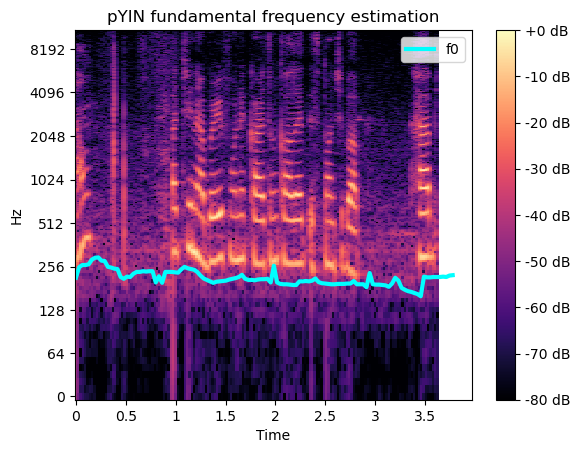

In [18]:
import matplotlib.pyplot as plt
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
fig, ax = plt.subplots()
img = librosa.display.specshow(D, x_axis='time', y_axis='log', ax=ax)
ax.set(title='pYIN fundamental frequency estimation')
fig.colorbar(img, ax=ax, format="%+2.f dB")
ax.plot(times, ff, label='f0', color='cyan', linewidth=3)
ax.legend(loc='upper right')

In [19]:
y = df_train_dropped['audio_signal'][0].copy()

def fundamental_frequency(df):
    f0, a, b = librosa.pyin(df['audio_signal'],sr=sr,fmin=librosa.note_to_hz('C2'), fmax=librosa.note_to_hz('C7'))
    f0 = f0[~np.isnan(f0)]
    if len(f0) != 0:
        max_frequency = f0.max()
        min_frequency = f0.min()
        std_frequency = f0.std()
        median_frequency = np.median(f0)
    else:
        median_frequency = 0
        max_frequency = 0
        min_frequency = 0
        std_frequency = 0
    df['f0_max'] = max_frequency
    df['f0_min'] = min_frequency
    df['f0_median'] = median_frequency
    df['f0_std'] = std_frequency
    return df
df_train_dropped = df_train_dropped.apply(fundamental_frequency, axis = 1)
df_test_dropped = df_test_dropped.apply(fundamental_frequency, axis = 1)

In [20]:
# dropping original signal
df_train_dropped_no_audio = df_train_dropped.drop(columns=['audio_signal'])
df_test_dropped_no_audio = df_test_dropped.drop(columns=['audio_signal'])

X_train = df_train_dropped_no_audio.drop(columns=['label'])
y_train = df_train_dropped_no_audio['label']

X_test = df_test_dropped_no_audio.drop(columns=['label'])
y_test = df_test_dropped_no_audio['label']

In [24]:
df_train_dropped.to_csv('train.csv',index = False)
df_test_dropped.to_csv('test.csv', index = False)

In [43]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from scipy import stats
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

# Label Encoding
LE = LabelEncoder()
y_train_label = LE.fit_transform(y_train)
y_test_label = LE.transform(y_test)

In [49]:
target = y_train
anova_results = {}
for feature in X_train_scaled:
    groups = [X_train_scaled.loc[target == val, feature] for val in target.unique()]
    f_stat, p_val = stats.f_oneway(*groups)
    anova_results[feature] = p_val

anova_results_df = pd.DataFrame(list(anova_results.items()), columns=['Feature', 'P-value'])
anova_results_df.sort_values(by='P-value', inplace=True, ascending=True)
print("ANOVA results:")
print(anova_results_df)

ANOVA results:
            Feature       P-value
0       speech_rate  4.959230e-94
33    mfcc_15(mean)  7.248064e-44
26     mfcc_11(std)  3.159723e-41
14      mfcc_5(std)  1.502363e-37
27    mfcc_12(mean)  9.964873e-37
10      mfcc_3(std)  3.422827e-33
20      mfcc_8(std)  1.285156e-32
2      1gram_repeat  7.933254e-28
18      mfcc_7(std)  1.396149e-27
12      mfcc_4(std)  2.240666e-27
8       mfcc_2(std)  2.309380e-25
23    mfcc_10(mean)  1.561427e-24
29    mfcc_13(mean)  2.383112e-24
30     mfcc_13(std)  3.556865e-19
5      mfcc_1(mean)  1.368476e-18
16      mfcc_6(std)  3.747765e-18
57        f0_median  3.541006e-16
24     mfcc_10(std)  4.567352e-16
21     mfcc_9(mean)  2.928717e-14
37    mfcc_17(mean)  3.162059e-14
22      mfcc_9(std)  7.159971e-14
25    mfcc_11(mean)  9.164815e-14
28     mfcc_12(std)  1.934317e-13
42     mfcc_19(std)  8.398679e-11
43    mfcc_20(mean)  1.800309e-10
46     mfcc_21(std)  8.572319e-10
32     mfcc_14(std)  3.352236e-09
6       mfcc_1(std)  3.806626e-09

In [48]:
print(len(anova_results_df))
print(len(anova_results_df[anova_results_df['P-value'] < 0.5]))

59
56


In [76]:
from xgboost import XGBClassifier
from sklearn.model_selection import KFold, RandomizedSearchCV

clf_xgb = XGBClassifier()
param_dist = {'n_estimators': stats.randint(150, 1000),
              'learning_rate': stats.uniform(0.01, 0.59),
              'subsample': stats.uniform(0.3, 0.6),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.4),
              'min_child_weight': [1, 2, 3, 4]
             }

In [77]:
numFolds = 5
kfold_5 = KFold(n_splits=numFolds, shuffle=True, random_state=42)

In [78]:
clf = RandomizedSearchCV(clf_xgb, 
                         param_distributions = param_dist,
                         cv = kfold_5,  
                         n_iter = 5, # you want 5 here not 25 if I understand you correctly 
                         scoring = 'roc_auc', 
                         error_score = 0, 
                         verbose = 3, 
                         n_jobs = -1)

In [79]:
clf.fit(X_train_scaled, y_train_label)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/Users/widss/tensorflow-test/Astonhack/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to 0. Details: 
Traceback (most recent call last):
  File "/Users/widss/tensorflow-test/Astonhack/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/widss/tensorflow-test/Astonhack/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/widss/tensorflow-test/Astonhack/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 452, in _score
    raise ValueError("{0} format is not supported".format(y_type))
ValueError: multiclass format is not supported

  warnings.warn(
/Users/widss/tensorflow-test/Astonhack/lib/python3.10/site-packages/sklearn/model_s

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
                   error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,...
                                        'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x16358b8b0>,
                                        'max_depth': [3, 4, 5, 6, 7, 8, 9],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x16358b220>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1636faa70>},
                   scoring='roc_auc', verbose=3)

In [81]:
params = clf.best_params_
print(params)

{'colsample_bytree': 0.5567669492410424, 'learning_rate': 0.022897387764799895, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 392, 'subsample': 0.7151370862316369}


In [82]:
classifier_model = XGBClassifier(
    learning_rate = 0.022897387764799895,
    n_estimators = 392,
    subsample = 0.7151370862316369,
    min_child_weight = 2,
    max_depth = 7,
    colsample_bytree = 0.5567669492410424
)

In [83]:
classifier_model.fit(X_train_scaled, y_train_label)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5567669492410424, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, feature_weights=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.022897387764799895,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=392, n_jobs=None,
              num_parallel_tree=None, ...)

In [84]:
preds = classifier_model.predict(X_test_scaled)

In [85]:
from sklearn.metrics import classification_report

preds = LE.inverse_transform(preds)

In [86]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

        High       0.98      0.99      0.99       115
Intermediate       0.90      0.90      0.90       130
         Low       0.89      0.88      0.89       102

    accuracy                           0.93       347
   macro avg       0.92      0.92      0.92       347
weighted avg       0.92      0.93      0.92       347

[CV 1/5] END colsample_bytree=0.5567669492410424, learning_rate=0.022897387764799895, max_depth=7, min_child_weight=1, n_estimators=392, subsample=0.7151370862316369;, score=0.000 total time=   5.2s
[CV 3/5] END colsample_bytree=0.5627495457489486, learning_rate=0.3381965013248925, max_depth=3, min_child_weight=3, n_estimators=407, subsample=0.46729298130360497;, score=0.000 total time=   0.5s
[CV 5/5] END colsample_bytree=0.5627495457489486, learning_rate=0.3381965013248925, max_depth=3, min_child_weight=3, n_estimators=407, subsample=0.46729298130360497;, score=0.000 total time=   0.7s
[CV 2/5] END colsample_b

In [87]:
import pickle as pk

In [89]:
with open ('voice_classifier.pk', 'wb') as f:
    pk.dump(classifier_model, f)

In [90]:
with open ('scaler.pk', 'wb') as f:
    pk.dump(scaler, f)

In [91]:
with open ('voice_labeler.pk', 'wb') as f:
    pk.dump(LE, f)